In [1]:
import numpy as np
import pandas as pd
import nltk


In [2]:
df=pd.read_csv("C:\\Users\\varad\\Desktop\\Projects\\covid19_tweets.csv")

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
import re

In [5]:
for col in df.columns:
    if(col!='text'):
        del df[col]

In [6]:
df.head()

,text
0,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...
4,25 July : Media Bulletin on Novel #CoronaVirus...


In [7]:
def remove_noise(text,noise):
    r=re.findall(noise,text)
    for i in r:
        text=re.sub(i,"",text)
    return text

In [8]:
df['Clean_text']=np.vectorize(remove_noise)(df['text'],"@[\w]*")
df['Clean_text']=df['Clean_text'].apply(lambda x:re.sub(r"http\S+\www\S+|https\S+", "",x,flags=re.MULTILINE))

In [9]:
df.head()

,text,Clean_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey PR and - wouldn't it have made more sens...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed #COVID19 was a hoa...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift #COVID19 has give me is an appre...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel #CoronaVirus...


In [10]:
df['Clean_text']=df["Clean_text"].str.replace("[^a-zA-z#]"," ")

C:\Users\varad\AppData\Local\Temp\ipykernel_19480\3182502448.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_text']=df["Clean_text"].str.replace("[^a-zA-z#]"," ")


In [11]:
df.head()

,text,Clean_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey PR and wouldn t it have made more sens...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed #COVID was a hoa...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift #COVID has give me is an appre...
4,25 July : Media Bulletin on Novel #CoronaVirus...,July Media Bulletin on Novel #CoronaVirus...


In [12]:
# df['Clean_text']=df['Clean_text'].apply(lambda x:re.sub(r"http\S+\www\S+|https\S+", "",x,flags=re.MULTILINE))
df['Clean_text']=df['Clean_text'].apply(lambda x: x.lower())

In [13]:
df['Clean_text']=df['Clean_text'].apply(lambda x: x.split())


In [14]:
df.head()

,text,Clean_text
0,If I smelled the scent of hand sanitizers toda...,"[if, i, smelled, the, scent, of, hand, sanitiz..."
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,"[hey, pr, and, wouldn, t, it, have, made, more..."
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,"[trump, never, once, claimed, #covid, was, a, ..."
3,@brookbanktv The one gift #COVID19 has give me...,"[the, one, gift, #covid, has, give, me, is, an..."
4,25 July : Media Bulletin on Novel #CoronaVirus...,"[july, media, bulletin, on, novel, #coronaviru..."


In [15]:
stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


In [16]:
for text in df['Clean_text']:
    for word in text:
        if (word in stop_words):
            text.remove(word)

In [17]:
df.head()

,text,Clean_text
0,If I smelled the scent of hand sanitizers toda...,"[smelled, scent, hand, sanitizers, today, some..."
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,"[hey, pr, wouldn, it, made, sense, have, playe..."
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,"[trump, never, claimed, #covid, a, hoax, all, ..."
3,@brookbanktv The one gift #COVID19 has give me...,"[one, gift, #covid, give, is, appreciation, th..."
4,25 July : Media Bulletin on Novel #CoronaVirus...,"[july, media, bulletin, novel, #coronavirusupd..."


In [18]:
# from nltk.stem.porter import PorterStemmer
from nltk import SnowballStemmer
snow_ball_stemmer=SnowballStemmer('english')

In [19]:
# stemmed_words=df['Clean_text']
i=0
while i <len(df['Clean_text']):
    s=""
    for word  in df['Clean_text'][i]:
        str=snow_ball_stemmer.stem(word)
        s+=str+" "
    df['Clean_text'][i]=s
    i+=1
    
    


In [20]:
df.head()

,text,Clean_text
0,If I smelled the scent of hand sanitizers toda...,smell scent hand sanit today someon the past i...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey pr wouldn it made sens have player pay res...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never claim #covid a hoax all claim this...
3,@brookbanktv The one gift #COVID19 has give me...,one gift #covid give is appreci the simpl thin...
4,25 July : Media Bulletin on Novel #CoronaVirus...,juli media bulletin novel #coronavirusupd #covid


In [21]:
from textblob import TextBlob

In [22]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
df['Subjectivity']=df['Clean_text'].apply(getsubjectivity)
df['Polarity']=df['Clean_text'].apply(getpolarity)

In [24]:
def getAnalysis (p):
    if(p<0):
        return 'Negative'
    elif (p>0):
        return 'Positive'
    else:
        return 'Neutral'
df["Analysis"]=df['Polarity'].apply(getAnalysis)

In [25]:
df['Analysis'].value_counts()

Neutral     94979
Positive    58507
Negative    25622
Name: Analysis, dtype: int64

In [26]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable


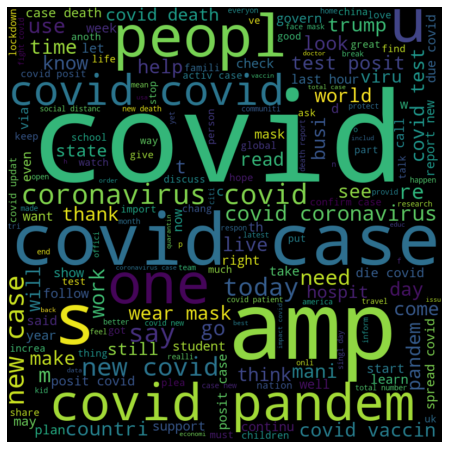

In [27]:
allTweets=' '.join([twts for twts in df['Clean_text']])
wordCloud = WordCloud(width = 800, height = 800,
                background_color ='black',
               
                min_font_size = 10).generate(allTweets)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()

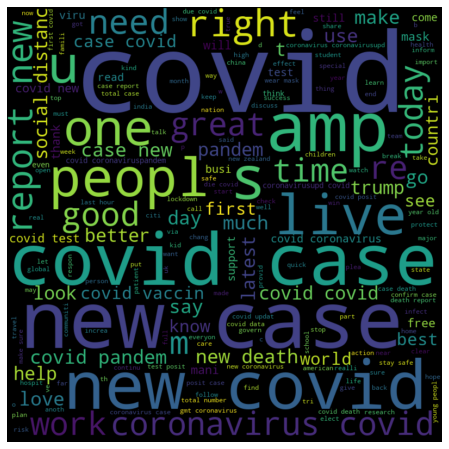

In [28]:
positive=' '.join([twts for twts in df[df['Polarity']>0]['Clean_text']])
wordCloud = WordCloud(width = 800, height = 800,
                background_color ='black',
               
                min_font_size = 10).generate(positive)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()

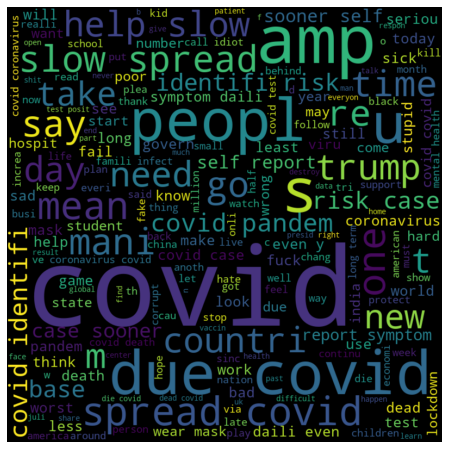

In [29]:
negative=' '.join([twts for twts in df[df['Polarity']<0]['Clean_text']])
wordCloud = WordCloud(width = 800, height = 800,
                background_color ='black',
               
                min_font_size = 10).generate(negative)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()